In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use("fivethirtyeight")

In [2]:
#Definamos el conjunto unidimensional de cantor
def cantor(n): #esta funcion ingresa la cant. iteraciones
    C=np.array([0,1]) #empiezo con 0 y 1
    for i in range(n): #en cada iteracion
        Cnew=np.concatenate((C/3,C/3+2/3)) #creo dos copias del anterior reescaleadas 1/3, una trasladada 2/3 y las uno 
        C = np.array([x for x in Cnew]) #defino el actual como el anterior para seguir iterando
    return Cnew
#Definamos el conjunto de cantor modificado
def cantor_mod(n,Np): #esta funcion ingresa la cant. iteraciones para hacer la parte cantor
    #y despues Np puntos distribuidos aleatoriamente en la parte recta.
    C=np.array([0,1/3]) #empiezo con 0 y 1/3
    for i in range(n): #en cada iteracion
        Cnew=np.concatenate((C/3,C/3+2/3)) #creo dos copias del anterior reescaleadas 1/3, una trasladada 2/3 y las uno 
        C = np.array([x for x in Cnew]) #defino el actual como el anterior para seguir iterando
    A=np.array([random.random()/3+2/3 for _ in range(Np)]) #la parte recta
    return np.concatenate((Cnew,A)) #las uno

cantidad de puntos:32768


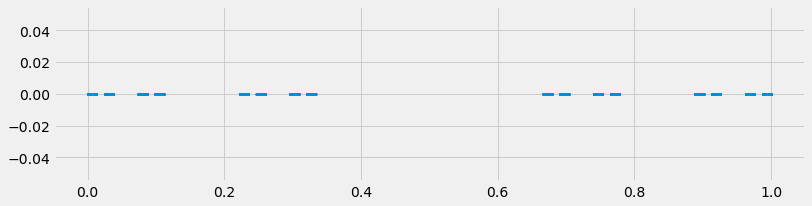

In [20]:
Can=cantor(14) #hagamos 14 iteraciones
print("cantidad de puntos:"+str(len(Can))) #veamos cuantos puntos conforman el conjunto 
fig=plt.figure(figsize=(12,3))
plt.scatter(Can,np.zeros_like(Can),s=1) #plot, np.zeros_like(A) crea un array de ceros con el mismo tamaño del arreglo A
plt.show()

cantidad de puntos:65536


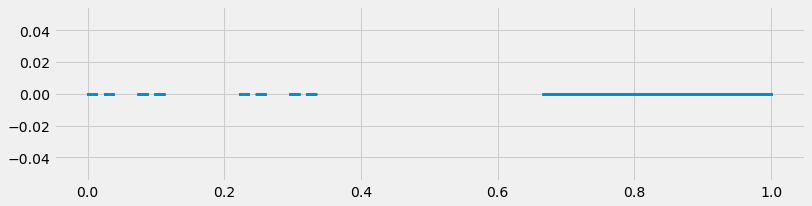

In [21]:
#ahora el modificado
Can_mod=cantor_mod(14,32768) #Np debe ser la cantidad de puntos de cantor comun / 2 para que el gráfico tenga balance
#y las probabilidades tengan sentido, si no estoy "pesando" más un lado que el otro.
print("cantidad de puntos:"+str(len(Can_mod))) 
fig=plt.figure(figsize=(12,3))
plt.scatter(Can_mod,np.zeros_like(Can_mod),s=1)
plt.show()

In [22]:
def S(k,q,A): #definamos la entropía generalizada para un conjunto A
    minA=np.amin(A)
    maxA=np.amax(A)
    d=(maxA-minA)*3**(-k) #delta es la longitud del conjunto dividida 3^k
    Count=[np.sum((A>minA+j*d)*(A<minA+(j+1)*d)) for j in range(3**k)] #creo un vector de conteos
    #básicamente en la comp. j de este vector está la cantidad de elementos entre minA+j*d y minA+(j+1)*d
    #por alguna razón, si uso menor igual o mayor igual, en lugar de desigualdades estrictas, se rompe todo.
    Probs=np.array(Count)/len(A) #la probabilidad va dividida por la cant total de puntos.
    Probs_nozeros=Probs[np.where(Probs!=0)] #es importante sacarse los ceros de encima para elevar a q's negativos
    if (q!=1):
        return np.log2(np.sum(np.array(Probs_nozeros)**q))/(1-q) #finalmente devuelvo la entropía

In [23]:
S(6,1.02,Can_mod) #un ejemplo

7.720745357181764

In [24]:
X=np.linspace(-30,30,90)
Dq3=[S(3,q,Can_mod)/(3*np.log2(3)) for q in X] #aqui preparamos para graficar Dq vs q, recordemos que -log2(3^-k)=klog2(3)
Dq4=[S(4,q,Can_mod)/(4*np.log2(3)) for q in X]
Dq5=[S(5,q,Can_mod)/(5*np.log2(3)) for q in X]

In [25]:
Dq6=[S(6,q,Can_mod)/(6*np.log2(3)) for q in X] #este podría tardar

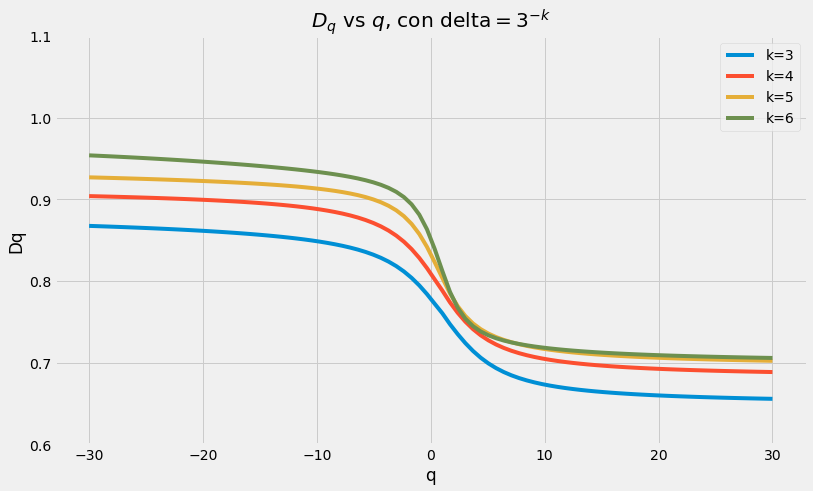

In [26]:
fig=plt.figure(figsize=(12,7))
plt.plot(X,Dq3,label="k=3")
plt.plot(X,Dq4,label="k=4")
plt.plot(X,Dq5,label="k=5")
plt.plot(X,Dq6,label="k=6")
plt.legend()
plt.ylim([0.6,1.1])
plt.xlabel('q')
plt.ylabel('Dq')
plt.title(r'$D_q$ vs $q$, con delta$=3^{-k}$')
plt.show()

In [17]:
#Comparemos con cantor usual
Dq3p=[S(3,q,Can)/(3*np.log2(3)) for q in X]
Dq4p=[S(4,q,Can)/(4*np.log2(3)) for q in X]
Dq5p=[S(5,q,Can)/(5*np.log2(3)) for q in X]

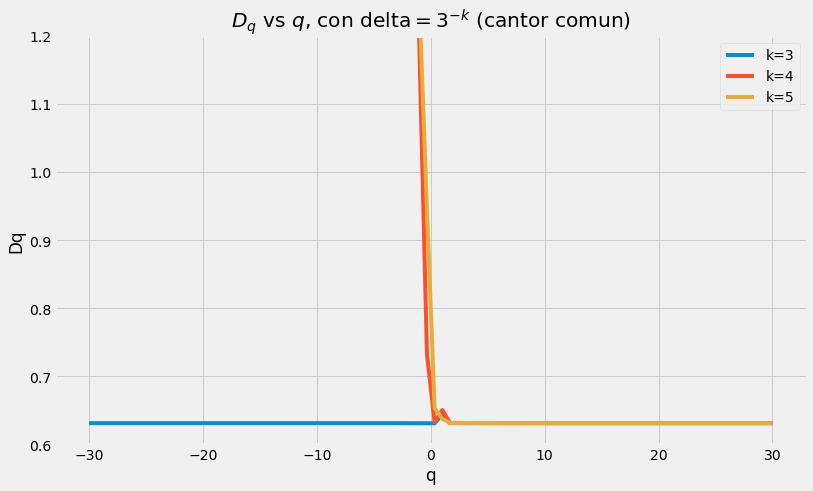

In [18]:
fig=plt.figure(figsize=(12,7))
plt.plot(X,Dq3p,label="k=3")
plt.plot(X,Dq4p,label="k=4")
plt.plot(X,Dq5p,label="k=5")
plt.legend()
plt.ylim([0.6,1.2])
plt.xlabel('q')
plt.ylabel('Dq')
plt.title(r'$D_q$ vs $q$, con delta$=3^{-k}$ (cantor comun)')
plt.show()
#Este gráfico tiene problemas numéricos, sospecho que sale de que algunas probabilidades son muuuy chicas y al
#elevarlas a la -q dan números gigantes, que dan resultados no consistentes con la teoría.